In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import geopandas as gpd


In [2]:
df = pd.read_csv('realtor-data.zip.csv')
df.dropna(axis=0, inplace=True)

C:\Users\LAILE\AppData\Local\Temp\ipykernel_9400\790472655.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(usa_states.geometry.centroid.x, usa_states.geometry.centroid.y, usa_states['state']):


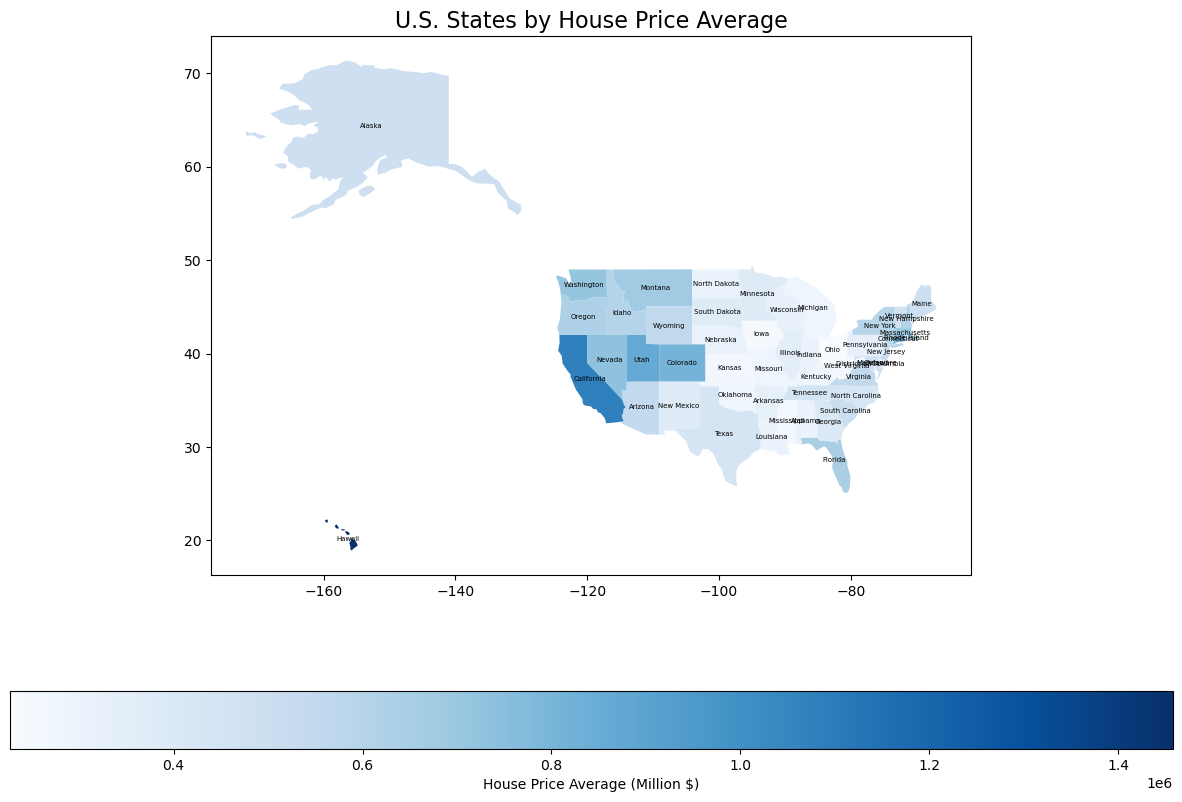

In [3]:
# 1. Đọc dữ liệu shapefile của các bang Mỹ
usa_states = gpd.read_file(r"C:\Users\LAILE\OneDrive\Máy tính\ADY201m\PythonProject_OnCourse\LAB\LAB3\America\DataSet\ne_110m_admin_1_states_provinces\ne_110m_admin_1_states_provinces.shp")  

# 2. Tạo dataframe
price_df = df.groupby('state').agg({'price': 'mean'}).reset_index()

# 3. Kết hợp dữ liệu dân số với dữ liệu hình dạng các bang
usa_states = usa_states.merge(price_df, left_on="name", right_on="state")

# 4. Vẽ bản đồ
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Sử dụng cột 'density' để điều chỉnh độ đậm nhạt của màu sắc
usa_states.plot(column='price', ax=ax, legend=True,
                legend_kwds={'label': "House Price Average (Million $)",
                             'orientation': "horizontal"},
                cmap='Blues')

# Thêm tên các bang
for x, y, label in zip(usa_states.geometry.centroid.x, usa_states.geometry.centroid.y, usa_states['state']):
    ax.text(x, y, label, fontsize=5, ha='center', va='center')

plt.title("U.S. States by House Price Average", fontsize=16);
